In [193]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Case 1

In [81]:
cat case1.jl

s = 0
n = 50000000
for i in 1:n
    s += i
end
println(s)


In [82]:
cat case1.py

s = 0
n = 50000000
for i in xrange(1, n + 1):
    s += i
print(s)


In [83]:
!time julia case1.jl

1250000025000000

real	0m9.859s
user	0m9.051s
sys	0m0.770s


In [84]:
!time python case1.py

1250000025000000

real	0m5.998s
user	0m5.738s
sys	0m0.046s


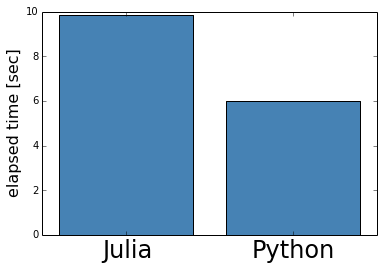

In [194]:
figsize(6, 4)
bar([1, 2], [9.859, 5.998], align="center", color="steelblue")
ylabel("elapsed time [sec]", fontsize=16)
xticks([1, 2], ["Julia", "Python"], fontsize=24)
savefig("images/case1.png")

In [69]:
cat case1.fix.jl

let
    s = 0
    n = 50000000
    for i in 1:n
        s += i
    end
    println(s)
end


In [70]:
!time julia case1.fix.jl

1250000025000000

real	0m0.494s
user	0m0.475s
sys	0m0.082s


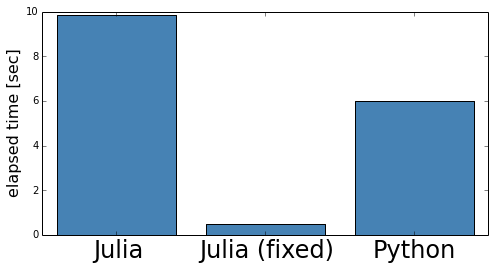

In [195]:
figsize(8, 4)
bar([1, 2, 3], [9.859, 0.494, 5.998], align="center", color="steelblue")
ylabel("elapsed time [sec]", fontsize=16)
xticks([1, 2, 3], ["Julia", "Julia (fixed)", "Python"], fontsize=24)
savefig("images/case1.fix.png")

In [116]:
9.859 / 0.494

19.95748987854251

## Case 2

In [118]:
cat case2.jl

function dot(x, y)
    s = 0
    for i in 1:length(x)
        s += x[i] * y[i]
    end
    s
end

n = 10000000
x = zeros(n)
y = zeros(n)
dot(x[1:3], y[1:3])  # compile


In [119]:
cat case2.py

def dot(x, y):
    s = 0
    for i in xrange(len(x)):
        s += x[i] * y[i]
    return s

n = 10000000
x = [0] * n
y = [0] * n


In [120]:
!julia -L case2.jl -e '@time dot(x, y)'

elapsed time: 0.814667538 seconds (320013880 bytes allocated, 17.52% gc time)


In [121]:
run case2

In [128]:
%timeit dot(x, y)

1 loops, best of 3: 1.1 s per loop


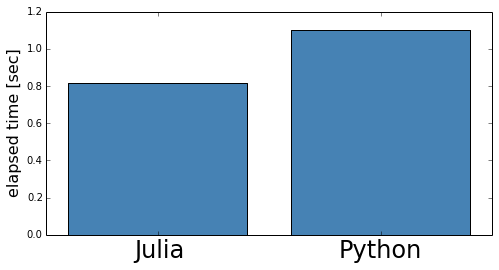

In [131]:
figsize(6, 4)
bar([1, 2], [0.814667538, 1.1], align="center", color="steelblue")
ylabel("elapsed time [sec]", fontsize=16)
xticks([1, 2], ["Julia", "Python"], fontsize=24)
savefig("images/case2.png")

In [126]:
cat case2.fix.jl

function dot(x, y)
    s = zero(eltype(x))
    for i in 1:length(x)
        s += x[i] * y[i]
    end
    s
end

n = 10000000
x = zeros(n)
y = zeros(n)
dot(x[1:3], y[1:3])  # compile


In [125]:
!julia -L case2.fix.jl -e '@time dot(x, y)'

elapsed time: 0.017035491 seconds (13896 bytes allocated)


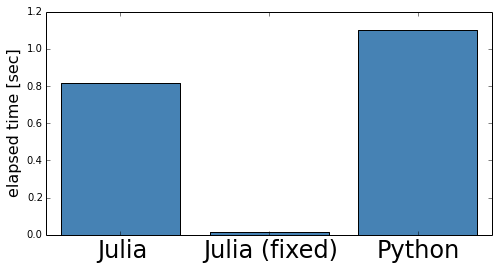

In [132]:
figsize(8, 4)
bar([1, 2, 3], [0.814667538, 0.017035491, 1.1], align="center", color="steelblue")
ylabel("elapsed time [sec]", fontsize=16)
xticks([1, 2, 3], ["Julia", "Julia (fixed)", "Python"], fontsize=24);
savefig("images/case2.fix.png")

In [144]:
0.814667538 / 0.017035491

47.82178206662785

In [142]:
!julia -L case2.jl -e '@code_llvm dot(x, y)'


define %jl_value_t* @julia_dot_19813(%jl_value_t*, %jl_value_t**, i32) {
top:
  %3 = alloca [5 x %jl_value_t*], align 8
  %.sub = getelementptr inbounds [5 x %jl_value_t*]* %3, i64 0, i64 0
  %4 = getelementptr [5 x %jl_value_t*]* %3, i64 0, i64 2, !dbg !287
  store %jl_value_t* inttoptr (i64 6 to %jl_value_t*), %jl_value_t** %.sub, align 8
  %5 = load %jl_value_t*** @jl_pgcstack, align 8, !dbg !287
  %6 = getelementptr [5 x %jl_value_t*]* %3, i64 0, i64 1, !dbg !287
  %.c = bitcast %jl_value_t** %5 to %jl_value_t*, !dbg !287
  store %jl_value_t* %.c, %jl_value_t** %6, align 8, !dbg !287
  store %jl_value_t** %.sub, %jl_value_t*** @jl_pgcstack, align 8, !dbg !287
  store %jl_value_t* null, %jl_value_t** %4, align 8, !dbg !287
  %7 = getelementptr [5 x %jl_value_t*]* %3, i64 0, i64 3
  store %jl_value_t* null, %jl_value_t** %7, align 8
  %8 = getelementptr [5 x %jl_value_t*]* %3, i64 0, i64 4
  store %jl_value_t* null, %jl_value_t** %8, align 8
  %9 = load %jl_value_t** %1, align 8, !d

In [143]:
!julia -L case2.fix.jl -e '@code_llvm dot(x, y)'


define double @julia_dot_19813(%jl_value_t*, %jl_value_t*) {
top:
  %2 = getelementptr inbounds %jl_value_t* %0, i64 2, !dbg !287
  %3 = bitcast %jl_value_t* %2 to i64*, !dbg !287
  %4 = load i64* %3, align 8, !dbg !287, !tbaa %jtbaa_arraylen
  %5 = icmp sgt i64 %4, 0, !dbg !287
  br i1 %5, label %L.preheader, label %L5, !dbg !287

L.preheader:                                      ; preds = %top
  %6 = load i64* %3, align 8, !dbg !292, !tbaa %jtbaa_arraylen
  %7 = getelementptr inbounds %jl_value_t* %1, i64 2, !dbg !292
  %8 = bitcast %jl_value_t* %7 to i64*, !dbg !292
  %9 = getelementptr inbounds %jl_value_t* %0, i64 1, !dbg !292
  %10 = bitcast %jl_value_t* %9 to i8**, !dbg !292
  %11 = getelementptr inbounds %jl_value_t* %1, i64 1, !dbg !292
  %12 = bitcast %jl_value_t* %11 to i8**, !dbg !292
  br label %L, !dbg !287

L:                                                ; preds = %L.preheader, %idxend2
  %"#s2.0" = phi i64 [ %19, %idxend2 ], [ 1, %L.preheader ]
  %s.0 = phi double [ 

## Case 3

In [188]:
cat case3.jl

function grad!(g::Vector, x::Vector)
    # dummy
end

function optimize(x0, n_iter)
    η = 0.1
    x = copy(x0)
    g = zeros(length(x0))
    for i in 1:n_iter
        grad!(g, x)
        x -= η * g
    end
    x
end

optimize(zeros(2), 3)
x0 = zeros(1000)


In [150]:
cat case3.py

import numpy as np

def set_grad(g, x):
    pass

def optimize(x0, n_iter):
    eta = 0.1
    x = np.copy(x0)
    g = np.zeros(len(x0))
    for i in xrange(n_iter):
        set_grad(g, x)
        x -= eta * g
    return x


In [189]:
!julia -L case3.jl -e '@time optimize(x0, 50000)'

elapsed time: 0.527045846 seconds (812429992 bytes allocated, 53.60% gc time)


In [179]:
run case3.py

In [180]:
x0 = np.zeros(1000)

In [181]:
%timeit optimize(x0, 50000)

10 loops, best of 3: 128 ms per loop


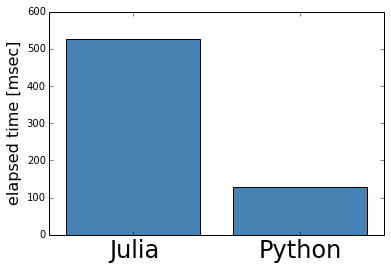

In [190]:
figsize(6, 4)
bar([1, 2], [0.527045846 * 1000, 128], align="center", color="steelblue")
ylabel("elapsed time [msec]", fontsize=16)
xticks([1, 2], ["Julia", "Python"], fontsize=24)
savefig("images/case3.png")

In [156]:
cat case3.fix.jl

function grad!(g::Vector, x::Vector)
    # dummy
end

function optimize(x0, iter)
    η = 0.1
    n = length(x0)
    x = copy(x0)
    g = zeros(n)
    for i in 1:iter
        grad!(g, x)
        for j in 1:n
            x[j] -= η * g[j]
        end
    end
    x
end

optimize(zeros(2), 3)
x0 = zeros(1000)


In [183]:
!julia -L case3.fix.jl -e '@time optimize(x0, 50000)'

elapsed time: 0.061146564 seconds (29976 bytes allocated)


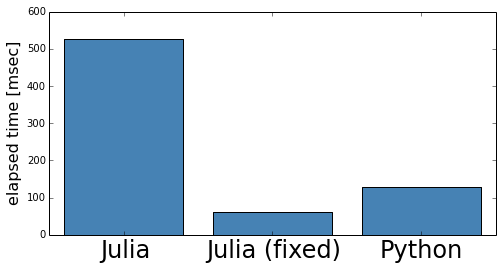

In [191]:
figsize(8, 4)
bar([1, 2, 3], [0.527045846 * 1000, 0.061146564 * 1000, 128], align="center", color="steelblue")
ylabel("elapsed time [msec]", fontsize=16)
xticks([1, 2, 3], ["Julia", "Julia (fixed)", "Python"], fontsize=24);
savefig("images/case3.fix.png")

In [185]:
cat case3.blas.jl

function grad!(g::Vector, x::Vector)
    # dummy
end

function optimize(x0, iter)
    η = 0.1
    n = length(x0)
    x = copy(x0)
    g = zeros(n)
    for i in 1:iter
        grad!(g, x)
        BLAS.scal!(n, η, g, 1)
    end
    x
end

optimize(zeros(2), 3)
x0 = zeros(1000)


In [186]:
!julia -L case3.blas.jl -e '@time optimize(x0, 50000)'

elapsed time: 0.009124907 seconds (29976 bytes allocated)


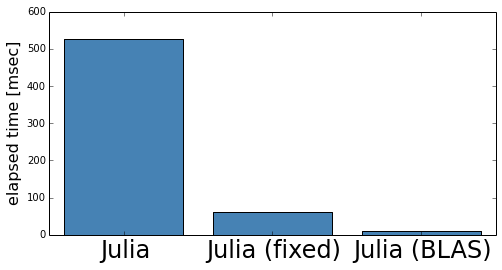

In [192]:
figsize(8, 4)
bar([1, 2, 3], [0.527045846 * 1000, 0.061146564 * 1000, 0.009124907 * 1000], align="center", color="steelblue")
ylabel("elapsed time [msec]", fontsize=16)
xticks([1, 2, 3], ["Julia", "Julia (fixed)", "Julia (BLAS)"], fontsize=24);
savefig("images/case3.blas.png")

## Versions and Environment

In [173]:
import sys
print sys.version
np.__config__.show()

2.7.9 (default, Feb  4 2015, 03:28:46) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.56)]
lapack_opt_info:
    extra_link_args = ['-Wl,-framework', '-Wl,Accelerate']
    extra_compile_args = ['-msse3', '-DAPPLE_ACCELERATE_SGEMV_PATCH']
    define_macros = [('NO_ATLAS_INFO', 3)]
openblas_lapack_info:
  NOT AVAILABLE
atlas_3_10_blas_threads_info:
  NOT AVAILABLE
atlas_threads_info:
  NOT AVAILABLE
atlas_3_10_threads_info:
  NOT AVAILABLE
atlas_blas_info:
  NOT AVAILABLE
atlas_3_10_blas_info:
  NOT AVAILABLE
atlas_blas_threads_info:
  NOT AVAILABLE
openblas_info:
  NOT AVAILABLE
blas_mkl_info:
  NOT AVAILABLE
blas_opt_info:
    extra_link_args = ['-Wl,-framework', '-Wl,Accelerate']
    extra_compile_args = ['-msse3', '-DAPPLE_ACCELERATE_SGEMV_PATCH', '-I/System/Library/Frameworks/vecLib.framework/Headers']
    define_macros = [('NO_ATLAS_INFO', 3)]
atlas_info:
  NOT AVAILABLE
atlas_3_10_info:
  NOT AVAILABLE
lapack_mkl_info:
  NOT AVAILABLE
mkl_info:
  NOT AVAILABLE


In [13]:
!julia -e 'versioninfo()'

Julia Version 0.3.7
Commit cb9bcae* (2015-03-23 21:36 UTC)
Platform Info:
  System: Darwin (x86_64-apple-darwin14.1.0)
  CPU: Intel(R) Core(TM) i5-4288U CPU @ 2.60GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas
  LIBM: libopenlibm
  LLVM: libLLVM-3.3
